# Analysis

In the sister notebook, we have aggregated Fitbit data from a few sources, to combine sleep data with activity levels. In this notebook, we will study the relationship between these variables.

## Setup

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Fitbit_data_agg.csv')

In [10]:
df.head()

,date,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,calories,distance
0,2020-10-14,29272484200,2020-10-14T08:37:30Z,79,21,21,37,74,45,0.089061,773.32,18780
1,2020-10-13,29258226487,2020-10-13T08:34:30Z,83,18,21,44,66,45,0.104386,3769.94,1485000
2,2020-10-12,29239981449,2020-10-12T08:36:00Z,78,22,20,36,87,45,0.089728,3007.74,715940
3,2020-10-11,29227910597,2020-10-11T09:26:00Z,80,19,22,39,75,45,0.066084,3891.34,1336270
4,2020-10-10,29215246798,2020-10-10T09:23:00Z,88,20,22,46,93,45,0.056881,3060.54,852090


## Shifting data

One important flaw in the current dataset is the following. A sleep score is timestamped by the date of *waking up*, which means that the current DataFrame lists all activity performed *after* the corresponding night's sleep.

Because we want to see the influence of activity on sleep quality, we want to compare the activity levels the day *before* a night's sleep. We thus need to shift the `calories` and `distance` columns down by one. However, before we do that, we need to sort by date!

In [17]:
df.sort_values('date', inplace=True)
df.head()

,date,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,calories,distance
186,2020-04-10,26680446028,2020-04-10T08:44:30Z,84,21,22,41,61,53,0.078285,3635.23,1479970
185,2020-04-11,26692362988,2020-04-11T08:09:00Z,86,22,21,43,93,46,0.070526,3183.30,667330
184,2020-04-12,26705213673,2020-04-12T08:29:30Z,80,22,20,38,105,45,0.090828,3364.11,1373720
183,2020-04-13,26717633856,2020-04-13T08:58:30Z,89,22,22,45,100,45,0.069432,2772.08,615080
182,2020-04-14,26733358149,2020-04-14T08:14:00Z,85,21,22,42,77,45,0.069486,2530.52,513160


In [18]:
df['calories'] = df['calories'].shift(1)
df['distance'] = df['distance'].shift(1)

In [19]:
df = df.dropna()

In [20]:
df.head()

,date,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness,calories,distance
185,2020-04-11,26692362988,2020-04-11T08:09:00Z,86,22,21,43,93,46,0.070526,3635.23,1479970.0
184,2020-04-12,26705213673,2020-04-12T08:29:30Z,80,22,20,38,105,45,0.090828,3183.30,667330.0
183,2020-04-13,26717633856,2020-04-13T08:58:30Z,89,22,22,45,100,45,0.069432,3364.11,1373720.0
182,2020-04-14,26733358149,2020-04-14T08:14:00Z,85,21,22,42,77,45,0.069486,2772.08,615080.0
181,2020-04-15,26751587476,2020-04-15T08:15:30Z,82,21,20,41,104,46,0.089269,2530.52,513160.0


## Correlations

Let's now see how `calories`, `distance` and `overall_score` relate:

<ipython-input-22-e057776029d0>:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bc89bdb50>,
      dtype=object)

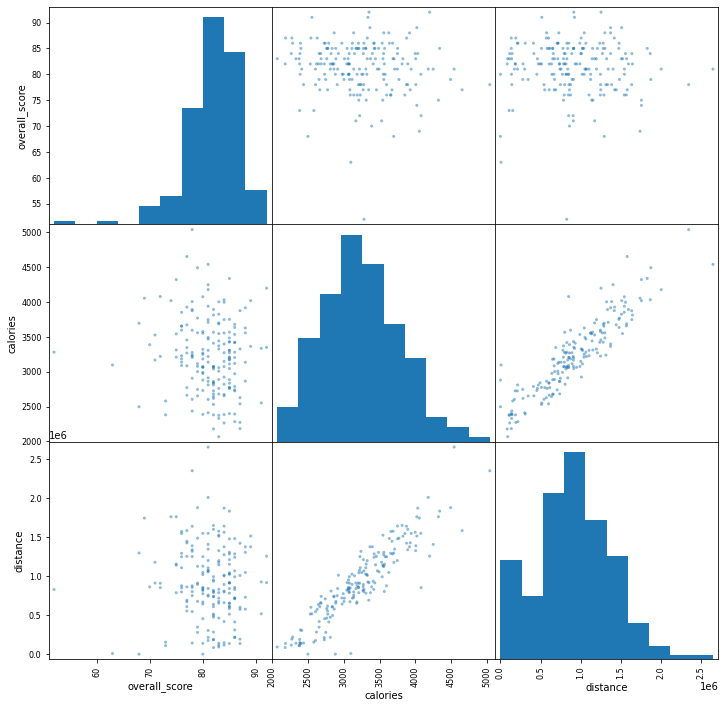

In [22]:
plt.figure(figsize=(12, 12))
pd.plotting.scatter_matrix(df[['overall_score', 'calories', 'distance']], ax=plt.gca())

                       sleep_log_entry_id  overall_score  composition_score  \
sleep_log_entry_id               1.000000      -0.165373          -0.169731   
overall_score                   -0.165373       1.000000           0.643700   
composition_score               -0.169731       0.643700           1.000000   
revitalization_score            -0.016472       0.563308           0.220811   
duration_score                  -0.143677       0.823823           0.275541   
deep_sleep_in_minutes            0.023140       0.462706           0.435513   
resting_heart_rate              -0.351061       0.166790           0.110244   
restlessness                     0.111687      -0.448020          -0.253037   
calories                        -0.125984      -0.120933          -0.032380   
distance                        -0.150751      -0.030205          -0.045481   

                       revitalization_score  duration_score  \
sleep_log_entry_id                -0.016472       -0.143677   
over

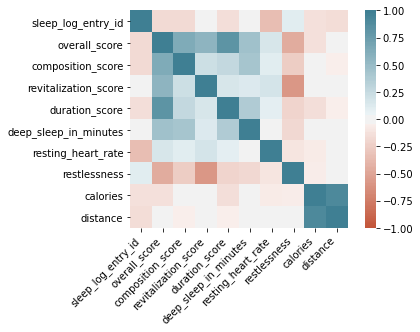

In [25]:
import seaborn as sns
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
print(corr)

Uh-oh. Looks like `calories` correlates minorly with `overall_score`, and `distance` really does not correlate at all. `calories` further has a moderate effect on `duration_score`, and that's about it.

So, this data does not support predicting sleep quality through activity levels. Better luck next time!